In [1]:
# Libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
# !pip install chardet
import chardet

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

### 2. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [2]:
# Getting character format
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

# Import data

df_dengue = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc, dtype={'Ubigeo': 'str'},low_memory = False)
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### 3. Generate ubigeo for Departments and Provinces taking the first two and four numbers.

In [3]:
df_dengue['IDPROV'] = df_dengue['Ubigeo'].astype(str).str[0:4]
df_dengue['IDDPTO'] = df_dengue['Ubigeo'].astype(str).str[0:2]

df_dengue=df_dengue.rename({'Ubigeo': 'IDDIST'}, axis=1)
df_dengue['IDDIST'] = df_dengue['IDDIST'].astype(str).astype(int)

df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,0809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17


### 4. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [ ]:
# Upload shapefile-distric level
maps = gpd.read_file(r'../../_data/shape_file/DISTRITOS.shp')
maps

In [6]:
# df_dengue[ 'Casos' ] = df_dengue[ 'Casos' ].str.replace( ",", "" )
# df_dengue[ 'Casos' ] = df_dengue[ 'Casos' ].fillna( 0 )
# df_dengue[ 'Casos' ] = df_dengue[ 'Casos' ].astype( str ).astype( int )
# df_dengue

In [ ]:
df_dengue_2021d = df_dengue[df_dengue.Año == 2021].copy()
df_dengue_2021d

df_dengue_2021d['Casos'] = df_dengue_2021d.Casos.astype( float ).copy()

df_dengue_2021d

df_dengue_2021d['Distrito'].unique().size

# group_by district
df_dist21 = df_dengue_2021d.groupby(['IDDIST'])['Casos'].sum().reset_index().copy()
df_dist21

# group_by district
#df_dengue_districts = df_dengue.copy()
#df_dengue_districts['Casos_distrito'] = df_dengue_districts.groupby(['Distrito'])['Casos_distrito'].transform('sum')

# Merge geometry with data
maps['IDDIST'] = maps['IDDIST'].astype(str).astype(int)

maps1 = maps[['IDDIST','DISTRITO', 'geometry']]
data_geo1 = maps1.merge( df_dist21, on = 'IDDIST', how = 'left' )
data_geo1

Text(0.5, 1.0, 'Number of Dengue Cases in 2021 by District')

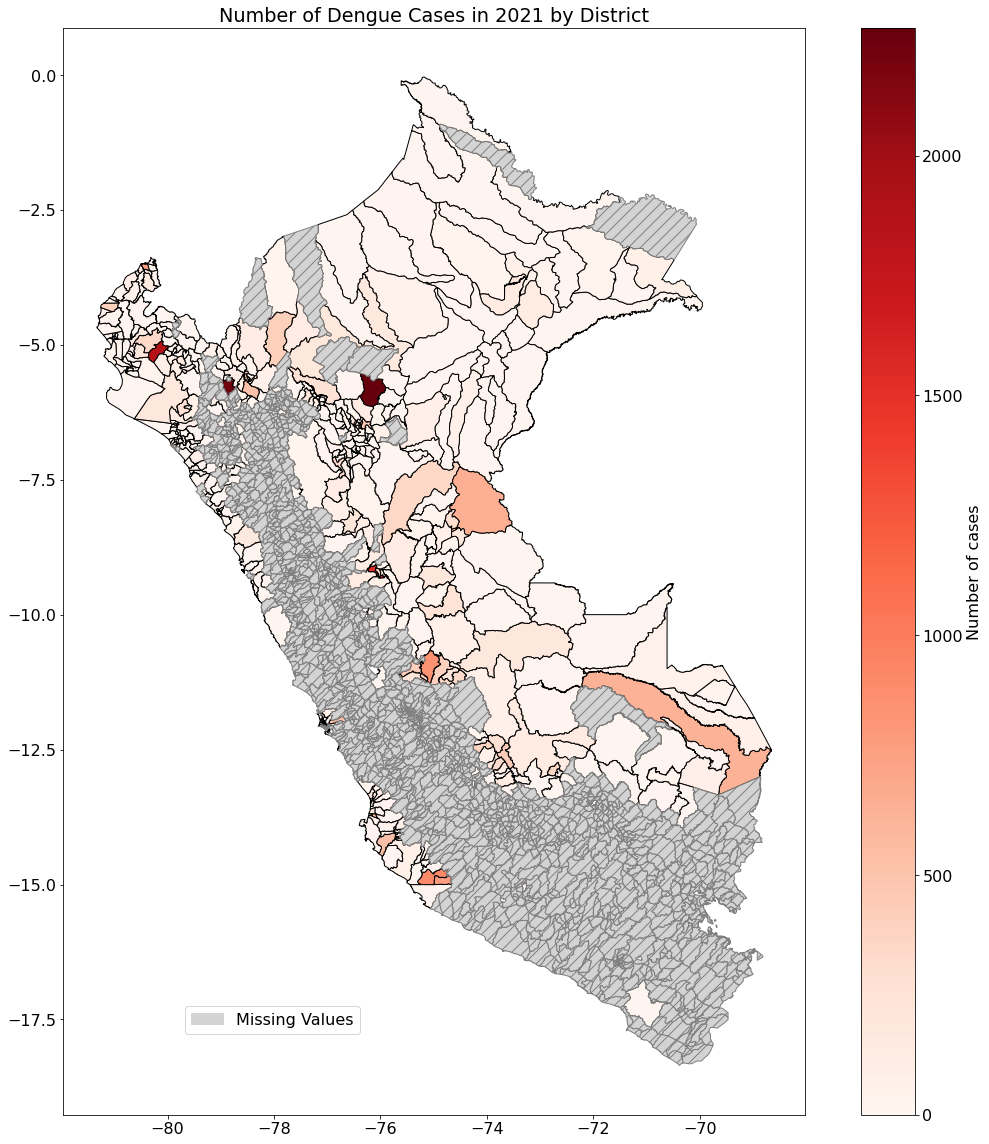

In [54]:
import matplotlib.patches as mpatches
plt.rcParams.update({'font.size': 16})
data_geo1.plot( column='Casos', cmap='Reds', 
              figsize=(20, 20), 
              linestyle='-',
              edgecolor='black', 
              missing_kwds= {
                  "color": "lightgrey",
                  "edgecolor": "gray",
                  "hatch": "//",
                "label": "Missing values",},
              legend = True, 
              legend_kwds = {'label': "Number of cases",
                            'orientation': "vertical"} )

# Extra legend for NA
# Trips leg
trips_patch = mpatches.Patch( color = 'lightgrey', 
                             label = 'Missing Values', hatch = "/" )
# Add legend
plt.legend( handles = [ trips_patch ],
            bbox_to_anchor=( 0.4, 0.1), loc = 0, 
            borderaxespad=0., prop = {'size': 16} )

# Title
plt.title( "Number of Dengue Cases in 2021 by District" )

### 5. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.


In [ ]:
df_dengue_2021d

In [42]:
df_dengue_2021d = df_dengue[df_dengue.Año == 2021].copy()
df_dengue_2021d

df_dengue_2021d['Casos'] = df_dengue_2021d.Casos.astype( float ).copy()

df_dengue_2021d

df_dengue_2021d['Distrito'].unique().size

# group_by district
df_prov21 = df_dengue_2021d.groupby(['IDPROV'])['Casos'].sum().reset_index().copy() \
                            .rename( columns = { 'Casos' : 'Casos_prov' } )

# Disolve
provs_shp = maps.dissolve( by = 'IDPROV' )

data_geo2 = provs_shp.merge( df_prov21, on = 'IDPROV', how = 'left', indicator = True  )

Text(0.5, 1.0, 'Number of Dengue Cases in 2021 by Province')

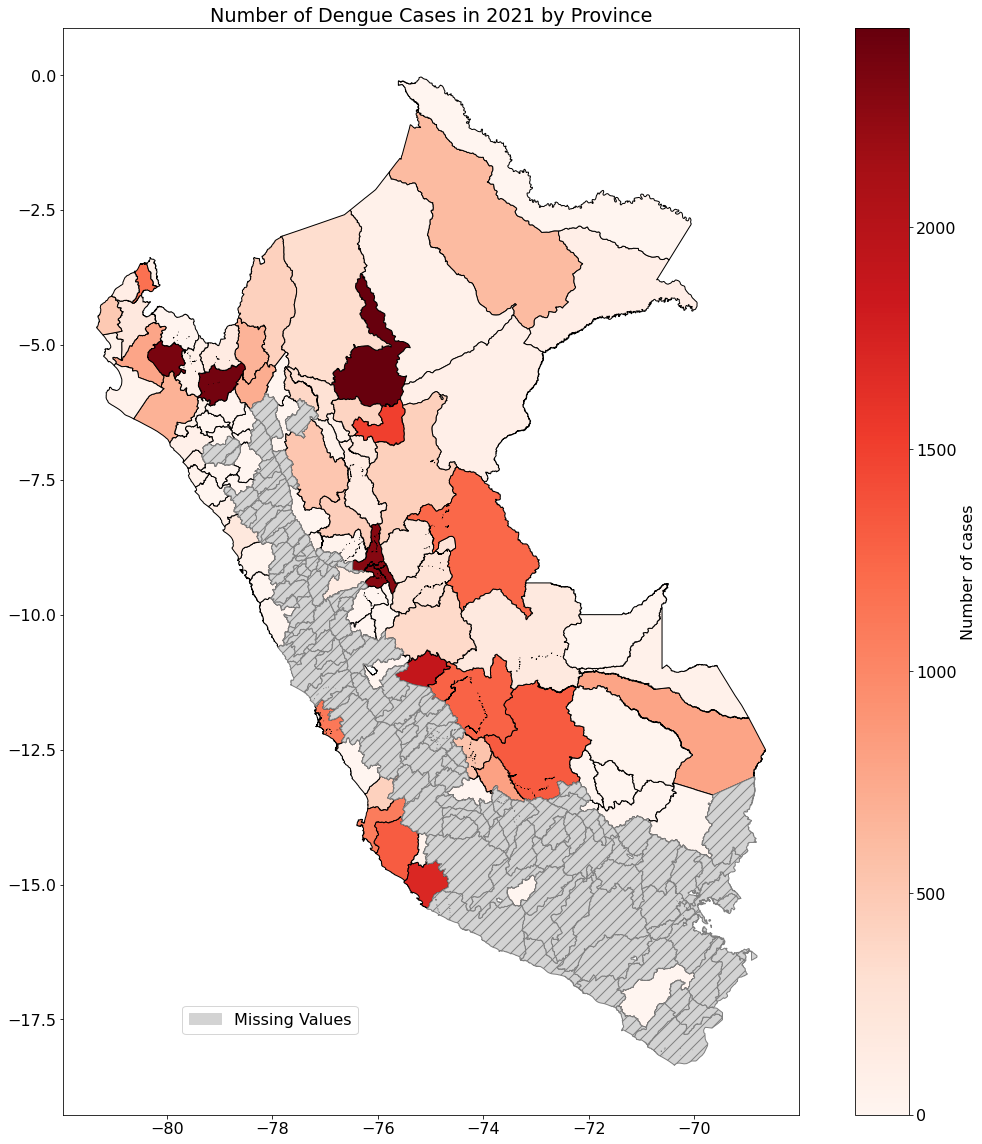

In [55]:
data_geo2.plot( column='Casos_prov', cmap='Reds', 
              figsize=(20, 20), 
              linestyle='-',
              edgecolor='black', 
              missing_kwds= {
                  "color": "lightgrey",
                  "edgecolor": "gray",
                  "hatch": "//",
                "label": "Missing values",},
              legend = True, legend_kwds={'label': "Number of cases",
                'orientation': "vertical"})

# Extra legend for NA
# Trips leg
trips_patch = mpatches.Patch( color = 'lightgrey', 
                             label = 'Missing Values', hatch = "/" )
# Add legend
plt.legend( handles = [ trips_patch ],
            bbox_to_anchor=( 0.4, 0.1), loc = 0, 
            borderaxespad=0., prop = {'size': 16} )

# Title
plt.title( "Number of Dengue Cases in 2021 by Province" )

### 6 Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [47]:
df_dengue_2021d.columns

Index(['Año', 'Semana', 'Eventos o daños', 'Departamento', 'Distrito',
       'Provincia', 'IDDIST', 'Casos', 'IDPROV', 'IDDPTO'],
      dtype='object')

In [48]:
df_dengue_2021d = df_dengue[df_dengue.Año == 2021].copy()
df_dengue_2021d

df_dengue_2021d['Casos'] = df_dengue_2021d.Casos.astype( float ).copy()

# group_by district
df_dpt21 = df_dengue_2021d.groupby(['IDDPTO'])['Casos'].sum().reset_index().copy() \
                            .rename( columns = { 'Casos' : 'Casos_dpt' } )

# Disolve
dpts_shp = maps.dissolve( by = 'IDDPTO' )

data_geo3 = dpts_shp.merge( df_dpt21, on = 'IDDPTO', how = 'left', indicator = True  )

In [51]:
df_dpt21.IDDPTO.unique().size

21

Text(0.5, 1.0, 'Number of Dengue Cases in 2021 by Department')

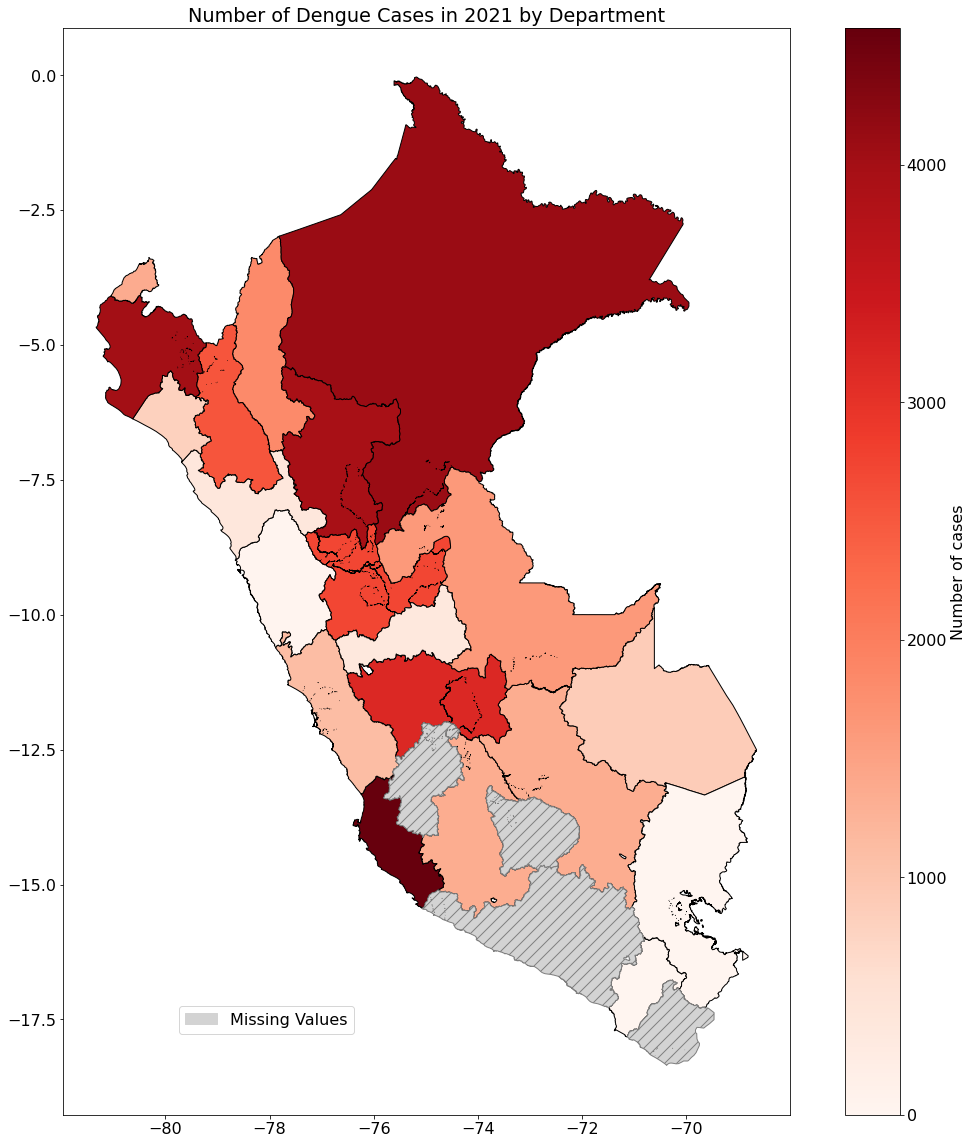

In [56]:
data_geo3.plot( column='Casos_dpt', cmap='Reds', 
              figsize=(20, 20), 
              linestyle='-',
              edgecolor='black', 
              missing_kwds= {
                  "color": "lightgrey",
                  "edgecolor": "gray",
                  "hatch": "//",
                "label": "Missing values",},
              legend = True, legend_kwds={'label': "Number of cases",
                'orientation': "vertical"})

# Extra legend for NA
# Trips leg
trips_patch = mpatches.Patch( color = 'lightgrey', 
                             label = 'Missing Values', hatch = "/" )
# Add legend
plt.legend( handles = [ trips_patch ],
            bbox_to_anchor=( 0.4, 0.1), loc = 0, 
            borderaxespad=0., prop = {'size': 16} )

# Title
plt.title( "Number of Dengue Cases in 2021 by Department" )

In [62]:
df_dengue['Casos'] = df_dengue.Casos.str.extract('(\d+)').astype(float)

In [63]:
df_dengue.columns

Index(['Año', 'Semana', 'Eventos o daños', 'Departamento', 'Distrito',
       'Provincia', 'IDDIST', 'Casos', 'IDPROV', 'IDDPTO'],
      dtype='object')

In [66]:
df_dengue_yr_dpt = df_dengue.groupby( ['Año', 'IDDPTO'], as_index = False )[['Casos']].sum()

In [67]:
df_geo4 = dpts_shp.merge( df_dengue_yr_dpt, on = 'IDDPTO', how = 'left', indicator = True  )

In [71]:
df_geo4.Año.unique()

array([2015., 2016., 2017., 2018., 2019., 2020., 2021.,   nan])

In [ ]:
ax.set

2015
2016
2017
2018
2019
2020
2021


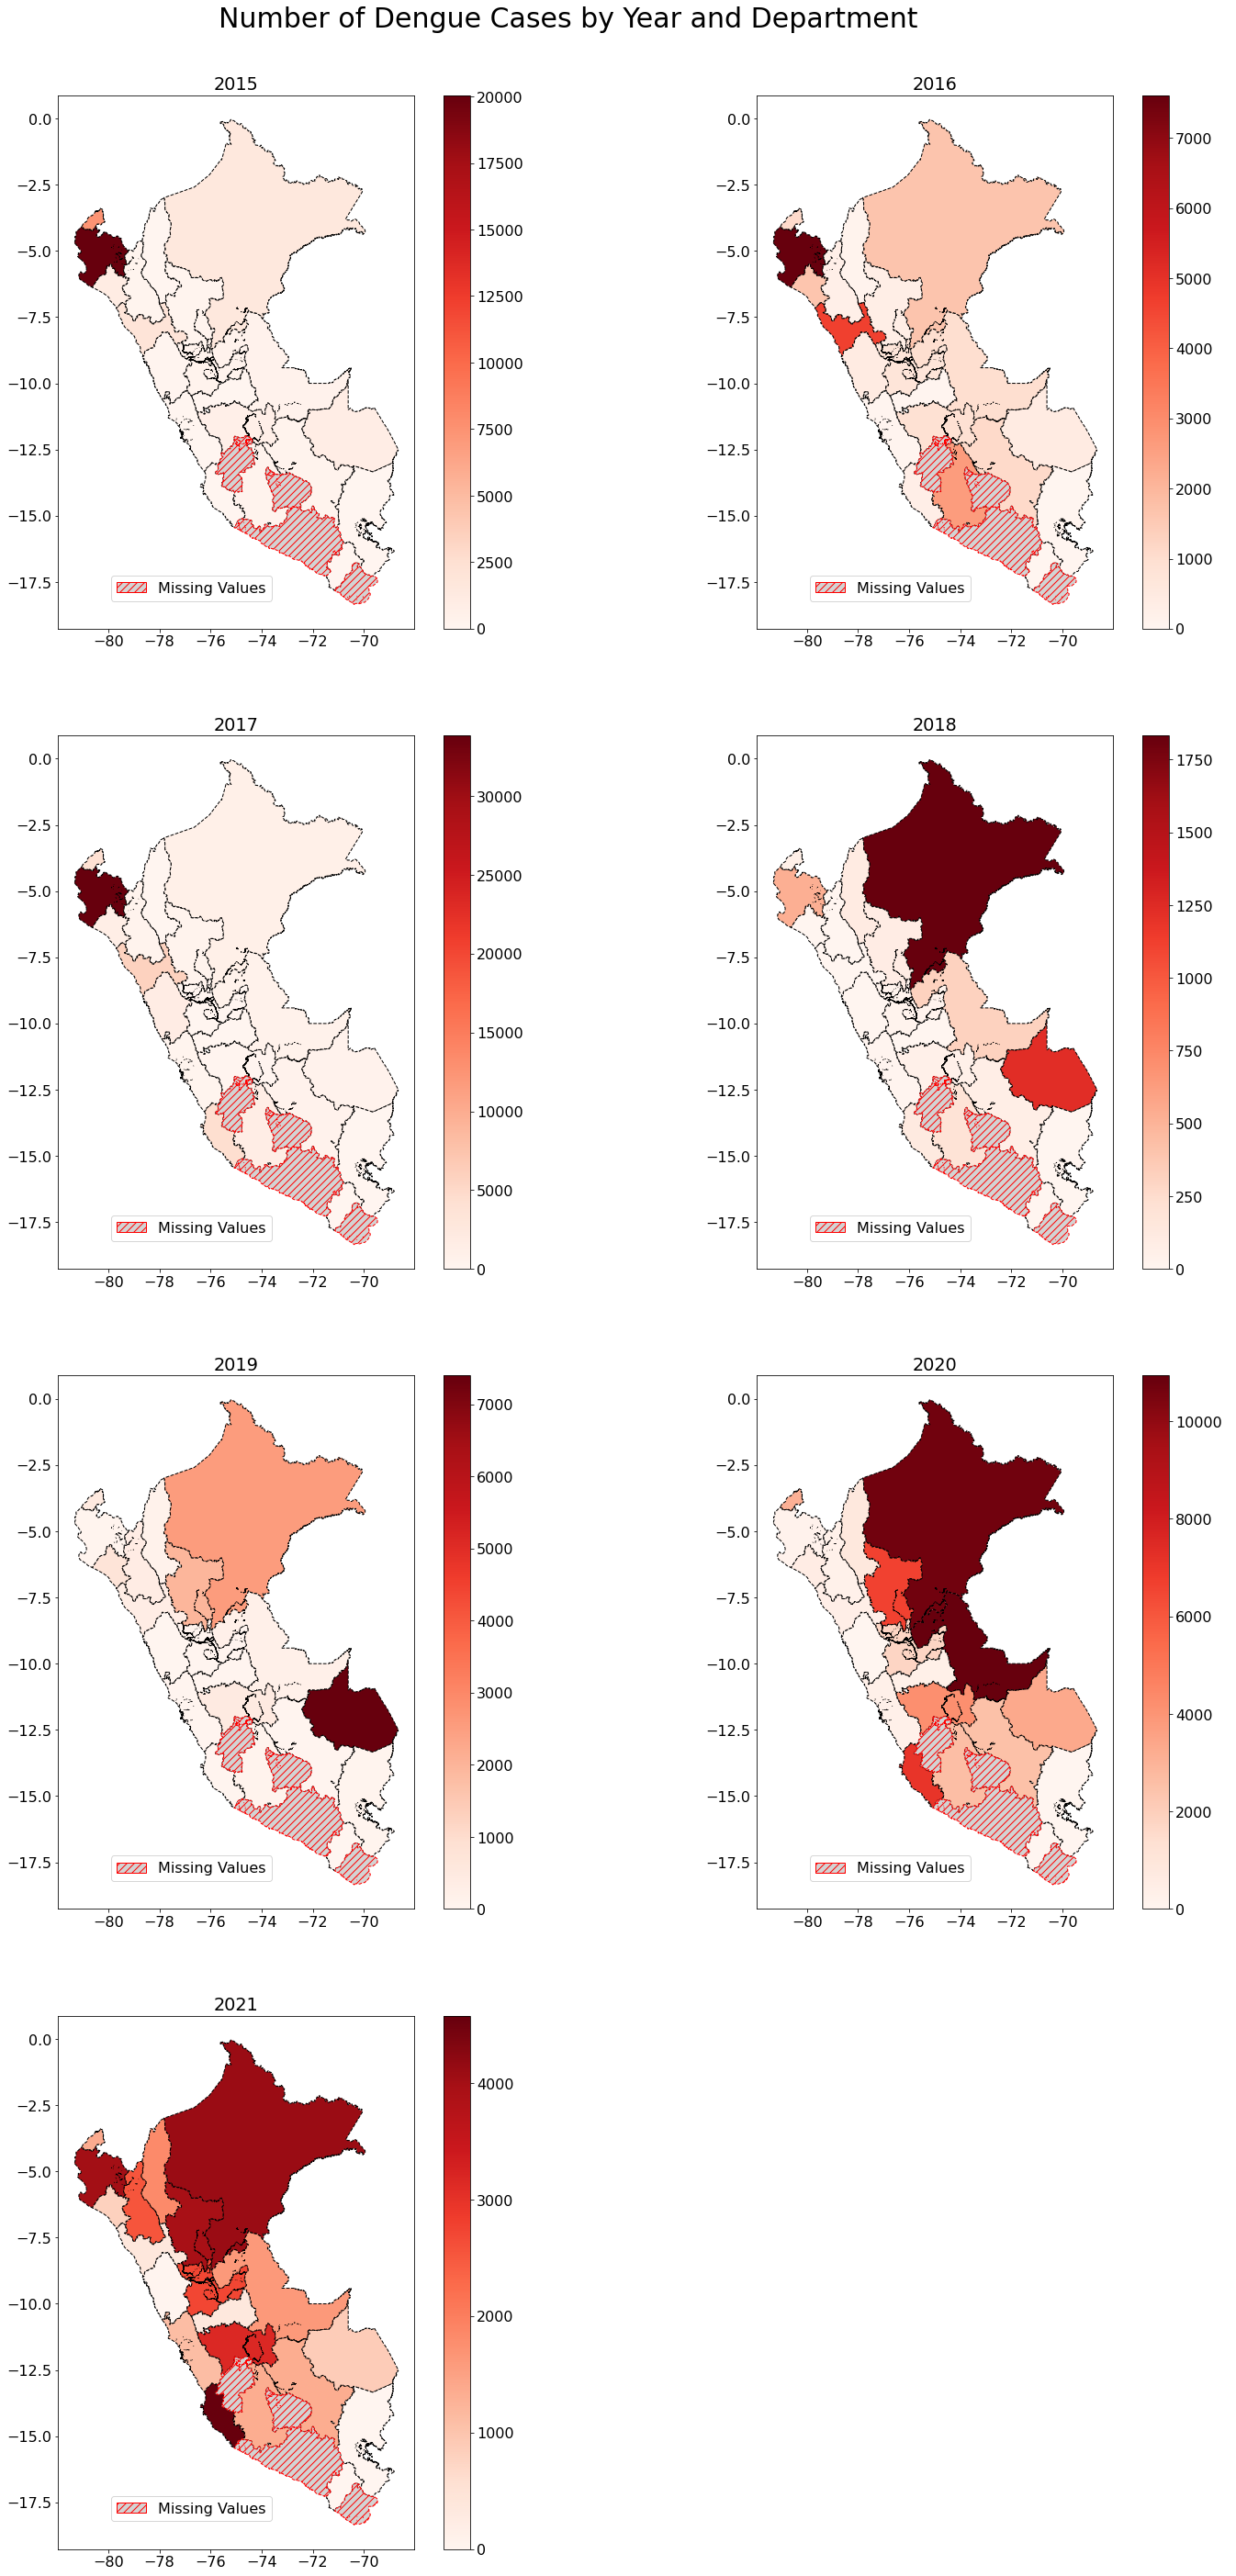

In [125]:
plt.rcParams.update({'font.size': 16})
fig, axis = plt.subplots( nrows = 4, ncols=2, figsize = ( 25, 45 ) )

idx = 0
for i in range( 4 ):
    for j in range( 2 ):
        
        ax = axis[ i ][ j ]
        if idx < 7:
            

            year = int( df_dengue_yr_dpt.Año.unique()[ idx ] )
            print(year)

            df_aux = df_dengue_yr_dpt[ df_dengue_yr_dpt.Año == year ].copy()
            
            
            df6 = dpts_shp.merge( df_aux, on = 'IDDPTO', how = 'left', indicator = True  )


            df6.plot( column='Casos', 
                     cmap='Reds', 
                     linestyle='--',
                     edgecolor='black', 
                     legend = True,
                     missing_kwds={
                         "color": "lightgrey",
                         "edgecolor": "red",
                         "hatch": "///",
                         "label": "Missing values",    },
                     ax = ax 
                    )


            ax.set_title( f"{year}" )
            # Extra legend for NA
            # Trips leg
            trips_patch = mpatches.Patch( edgecolor = 'red', facecolor = 'lightgrey', 
                                         label = 'Missing Values', hatch = "///" )
            # Add legend
            ax.legend( handles = [ trips_patch ],
                        bbox_to_anchor=( 0.6, 0.1), loc = 0, 
                        borderaxespad=0., prop = {'size': 16} )
            
        else:
            # Invisible axis
            for spine in ['top', 'right', 'left', 'bottom']:
                ax.spines[ spine ].set_visible(False)
            
            ax.xaxis.set_visible( False )
            ax.yaxis.set_visible( False )
            
        idx = 1 + idx

# settings all figure
fig.subplots_adjust(top=0.95)
fig.suptitle( "Number of Dengue Cases by Year and Department", 
                size = 30  )

# Save figure
plt.savefig( r"cases_year_dpt.png", bbox_inches='tight' )

# 7. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [107]:
df_dengue_2021d = df_dengue[df_dengue.Año == 2021].copy()
df_dengue_2021d

df_dengue_2021d['Casos'] = df_dengue_2021d.Casos.astype( float ).copy()

In [112]:
# getting quarter 
df_dengue_2021d['Semana'] = df_dengue_2021d['Semana'].astype( int )
df_dengue_2021d['qtr'] = ((df_dengue_2021d['Semana']) // 13) + 1
df_dengue_2021d.loc[ df_dengue_2021d['qtr'] == 5, 'qtr'] = 4

In [113]:
df_geo5 = df_dengue_2021d.groupby( ['qtr', 'IDDPTO' ], as_index = False )[['Casos']].sum()

In [116]:
df_geo5.qtr.unique()

array([1, 2, 3, 4])

1
2
3
4


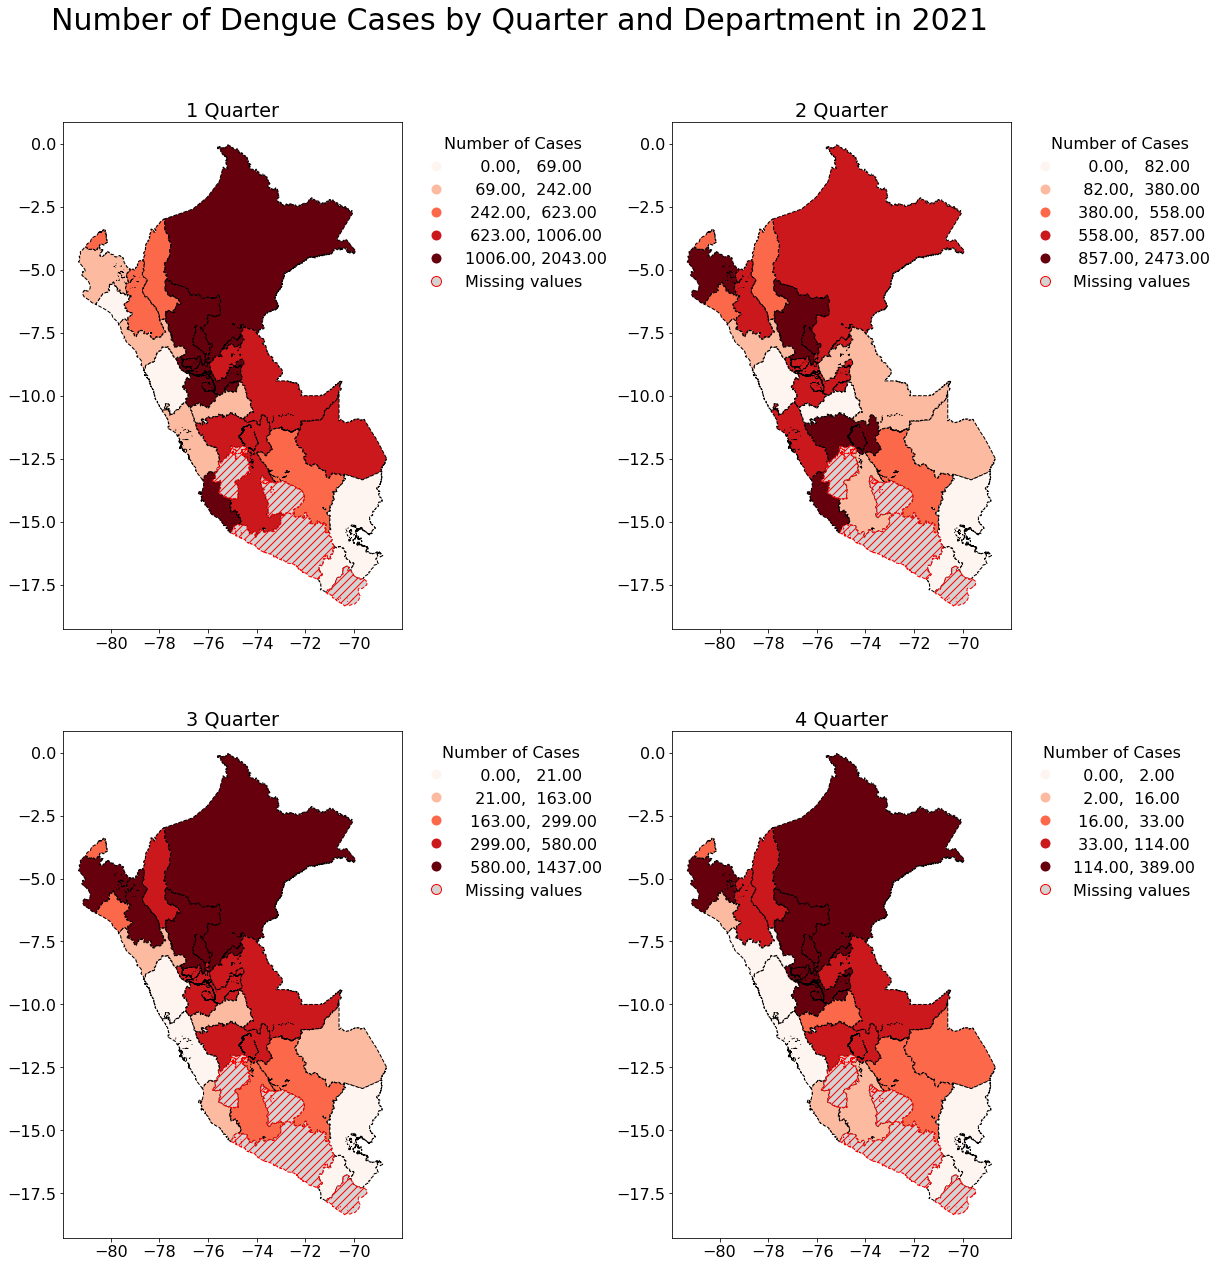

In [131]:
plt.rcParams.update({'font.size': 16})
fig, axis = plt.subplots( nrows = 2, ncols=2, figsize = ( 20, 20 ) )

idx = 0
for i in range( 2 ):
    for j in range( 2 ):
        
        ax = axis[ i ][ j ]
        if idx < 7:
            

            qrtr = int( df_geo5.qtr.unique()[ idx ] )
            print(qrtr)

            df_aux = df_geo5[ df_geo5.qtr == qrtr ].copy()
            
            
            df6 = dpts_shp.merge( df_aux, on = 'IDDPTO', how = 'left', indicator = True  )


            df6.plot( column='Casos', 
                     cmap='Reds', 
                     linestyle='--',
                     edgecolor='black', 
                     legend = True,
                     scheme = "quantiles", 
                     missing_kwds={
                         "color": "lightgrey",
                         "edgecolor": "red",
                         "hatch": "///",
                         "label": "Missing values",    },
                     legend_kwds=dict(  loc='upper left',
                                        bbox_to_anchor=(1.01, 1),
                                        title= "Number of Cases",  
                                        frameon= False ),
                     ax = ax 
                    )


            ax.set_title( f"{qrtr} Quarter" )
            
        else:
            # Invisible axis
            for spine in ['top', 'right', 'left', 'bottom']:
                ax.spines[ spine ].set_visible(False)
            
            ax.xaxis.set_visible( False )
            ax.yaxis.set_visible( False )
            
        idx = 1 + idx

# settings all figure
fig.subplots_adjust(top=0.9)
fig.suptitle( "Number of Dengue Cases by Quarter and Department in 2021", 
                size = 30  )

# Save figure
plt.savefig( r"cases_qrtr_dpt.png", bbox_inches='tight' )